In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect= True)

In [14]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
measurements_df = base.classes.measurement
station_df = base.classes.station


In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

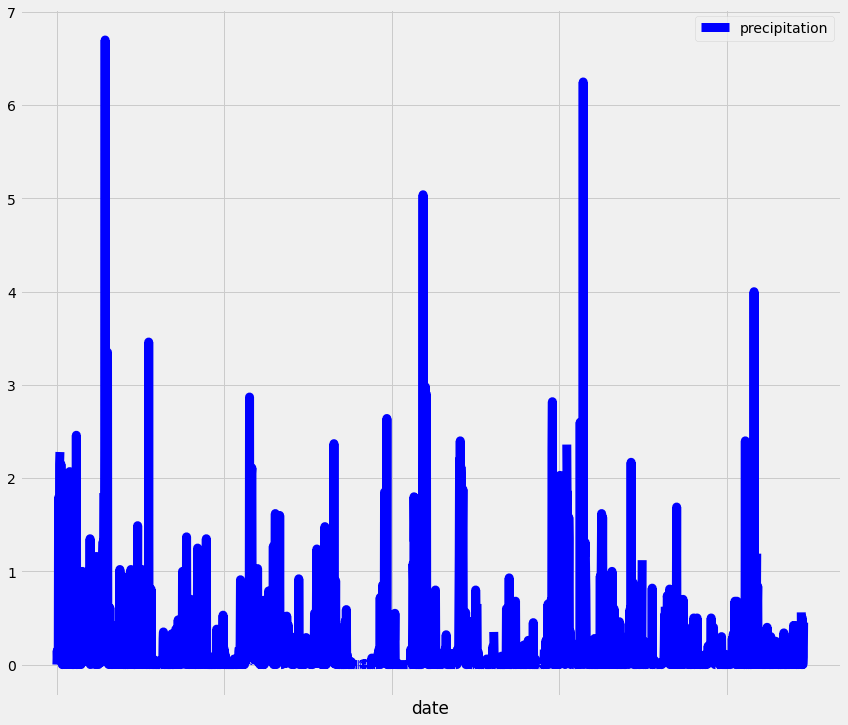

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
results_date=session.query(measurements_df.date).order_by(measurements_df.date.desc()).first()
str_date=list(np.ravel(results_date))[0]
latest_date=dt.datetime.strptime(str_date,"%Y-%m-%d")
year_back=latest_date-dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
results=session.query(measurements_df.date, measurements_df.prcp).order_by(measurements_df.date.asc()).\
        filter(measurements_df.date>=year_back)

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df=pd.DataFrame(results)
results_df=results_df.rename(columns={"prcp":"precipitation"})

# Use Pandas Plotting with Matplotlib to plot the data
ax= results_df.plot(color='b',figsize=(12,10),legend=True,linewidth=9.0,grid=True)
#Removing xticks
plt.setp(ax.get_xticklabels(), visible=False)
plt.tight_layout()
plt.xlabel("date")
plt.show()



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(func.count(station_df.id)).all()
station_count

[(9,)]

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results_temp=session.query(func.min(measurements_df.tobs), func.max(measurements_df.tobs), func.avg(measurements_df.tobs)).\
             filter(measurements_df.station==station_measurments_df_join[0][0]).all()
results_temp

NameError: name 'station_measurments_df_join' is not defined

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()